# Test `time_series_plots` Module

Render figure object produced by the `nowcast.figures.research.time_series_plots` module.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker
to help ensure that the module will work in the nowcast production context.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
# reload lets us pull in changes from modules that we edit
from importlib import reload

In [2]:
# imports from the top of the make_plots worker that we need for the test
import nowcast.figures.website_theme

from nowcast.figures.research import time_series_plots

In [3]:
# some extra imports that we need to simulate how the nowcast system works
import io

import yaml

Python and library versions:

In [4]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib
import numpy
import sys
import xarray

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.13.1 | packaged by conda-forge | (main, Jan 13 2025, 09:53:10) [GCC 13.3.0]'
numpy.__version__='2.2.1'
xarray.__version__='2025.1.1'
bottleneck.__version__='1.4.2'
h5netcdf.__version__='1.4.1'
h5py.__version__='3.12.1'
matplotlib.__version__='3.10.0'
cmocean.__version__='v3.0.3'


The bits of `config/nowcast.yaml` that are required:

In [5]:
config = '''
    figures:
      # ERDDAP dataset URLs
      dataset URLs:
        3d physics fields:
          https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DPhysicsFields1hV21-11
        3d biology fields:
          https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV21-11
'''

config = yaml.safe_load(io.StringIO(config))

## Simulate Dataset Loading in `_prep_nowcast_green_research_fig_functions()`

In [6]:
place = 'S3'

left_variable = 'nitrate'
right_variable = 'diatoms'

bio_dataset = xarray.open_dataset(
    config["figures"]["dataset URLs"]["3d biology fields"],
)


## Render the Figure

The `%%timeit` cell magic lets us keep an eye on how log the figure takes to process.
Setting `-n1 -r1` prevents it from processing the figure more than once
as it might try to do to generate better statistics.

The `reload()` calls reload imported modules so that any edits you have made will take effect here.

The `make_figure()` call should be the same as goes in the `make_plots` worker module.

11min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


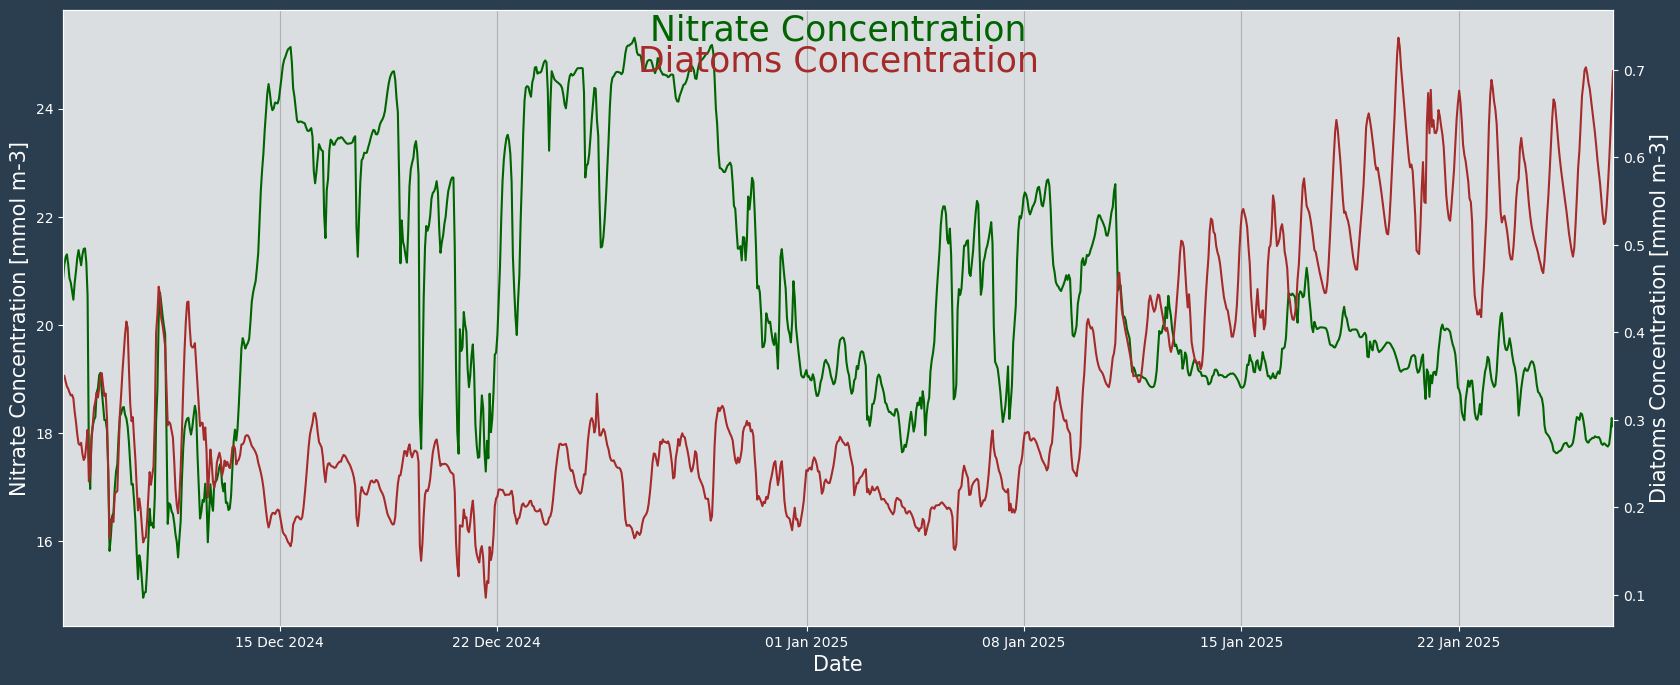

In [7]:
%%timeit -n1 -r1

reload(nowcast.figures.website_theme)
reload(time_series_plots)

fig = time_series_plots.make_figure(
    bio_dataset, left_variable, right_variable, place
)